Required Imports

In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

Loading the dataset

In [67]:
train = pd.read_csv('train.csv')

Basic overview

In [68]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [69]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

### categorical column :
Survived     
Pclass  
Sex  
SibSp        
Parch        
Embarked   

### Numerical column :
PassengerId           
Age                       
Fare

### Mixed column :
Name                       
Ticket                         
Cabin

In [70]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [71]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

- There are missing values in the 'Age', 'Cabin', and 'Embarked' columns of the training dataset.                       
- Cabin has a significant number of missing values, which may require special handling. so we will drop it for now.             
- some columns have incorrect data types. 

Dropping 'Cabin' column due to high number of missing values

In [72]:
train.drop(columns=['Cabin'], inplace=True)

Imputing missing values for 'Age' with mean

In [73]:
train['Age'].fillna(train['Age'].mean(), inplace=True)

C:\Users\Tanvy Verma\AppData\Local\Temp\ipykernel_31120\189249602.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train['Age'].fillna(train['Age'].mean(), inplace=True)


Missing value in 'Embarked' column filled with most frequent value

In [74]:
train['Embarked'].value_counts()
train['Embarked'].fillna('S', inplace=True)

C:\Users\Tanvy Verma\AppData\Local\Temp\ipykernel_31120\2207020285.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train['Embarked'].fillna('S', inplace=True)


Correcting the columns with inappropriate data type

In [75]:
train['Sex'] = train['Sex'].astype('category')
train['Embarked'] = train['Embarked'].astype('category')    
train['Pclass'] = train['Pclass'].astype('category')
train['Survived'] = train['Survived'].astype('category')
train['Age'] = train['Age'].astype('int64')

In [76]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  891 non-null    int64   
 1   Survived     891 non-null    category
 2   Pclass       891 non-null    category
 3   Name         891 non-null    object  
 4   Sex          891 non-null    category
 5   Age          891 non-null    int64   
 6   SibSp        891 non-null    int64   
 7   Parch        891 non-null    int64   
 8   Ticket       891 non-null    object  
 9   Fare         891 non-null    float64 
 10  Embarked     891 non-null    category
dtypes: category(4), float64(1), int64(4), object(2)
memory usage: 52.8+ KB


In [77]:
train.describe()

,PassengerId,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,29.544332,0.523008,0.381594,32.204208
std,257.353842,13.013778,1.102743,0.806057,49.693429
min,1.000000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,29.000000,0.000000,0.000000,14.454200
75%,668.500000,35.000000,1.000000,0.000000,31.000000
max,891.000000,80.000000,8.000000,6.000000,512.329200


## Visual analysis of some columns

<Axes: xlabel='Survived', ylabel='count'>

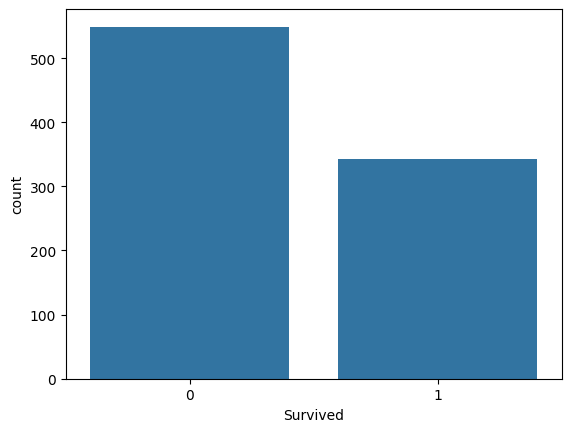

In [78]:
sns.countplot(x='Survived', data=train)

In [79]:
(train['Pclass'].value_counts()/891)*100

Pclass
3    55.106622
1    24.242424
2    20.650954
Name: count, dtype: float64

<Axes: xlabel='Pclass', ylabel='count'>

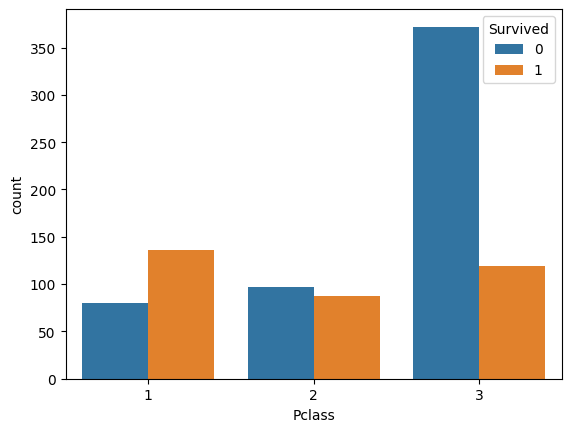

In [80]:
sns.countplot(data=train, x='Pclass', hue='Survived')

In [81]:
(train['Sex'].value_counts()/891)*100

Sex
male      64.758698
female    35.241302
Name: count, dtype: float64

<Axes: xlabel='Sex', ylabel='count'>

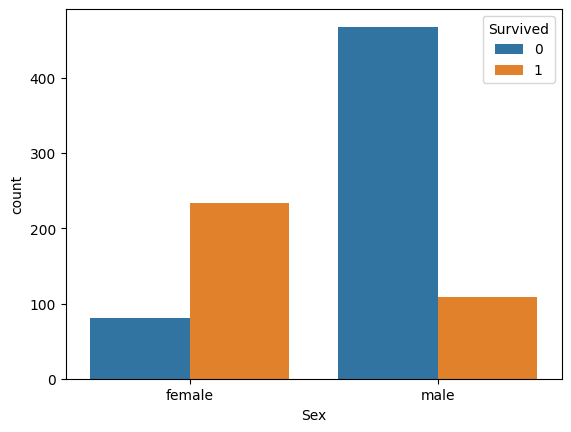

In [82]:
sns.countplot(data=train, x='Sex', hue='Survived')

In [83]:
(train['Embarked'].value_counts()/891)*100

Embarked
S    72.502806
C    18.855219
Q     8.641975
Name: count, dtype: float64

<Axes: xlabel='Sex', ylabel='count'>

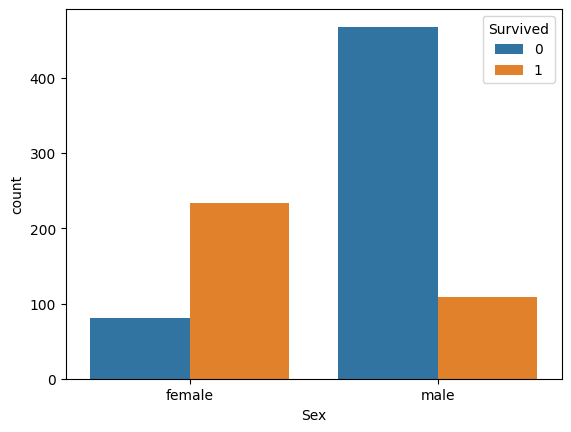

In [84]:
sns.countplot(data=train, x='Sex', hue='Survived')

29.544332210998878
0.45956263424701577
0.9865867453652877


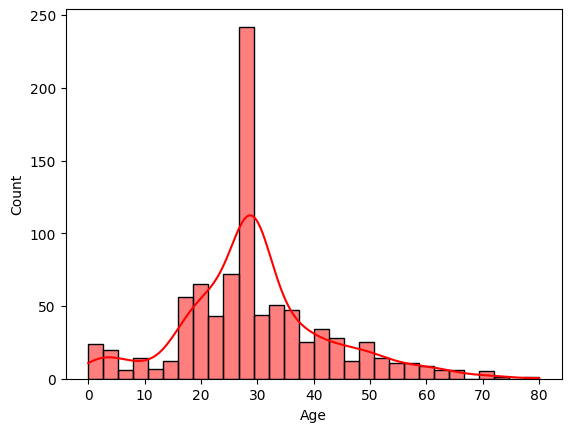

In [85]:
sns.histplot(data=train, x='Age', bins=30, kde=True, color='red')
print(train['Age'].mean())
print(train['Age'].skew())
print(train['Age'].kurt())

<Axes: xlabel='Age'>

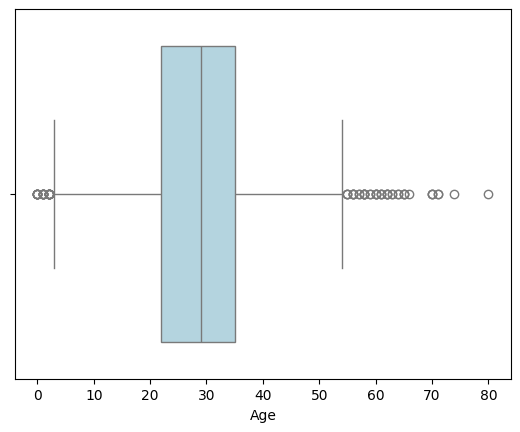

In [86]:
sns.boxplot(data=train, x='Age', color='lightblue')

Age is mostly likely normal distribution as skewness lies in the range of 0.5 and kurtosis is also not soo high            
For outliers we need deeper analysis because outlir section also contain significant number of values

32.204207968574636
4.787316519674893
33.39814088089868


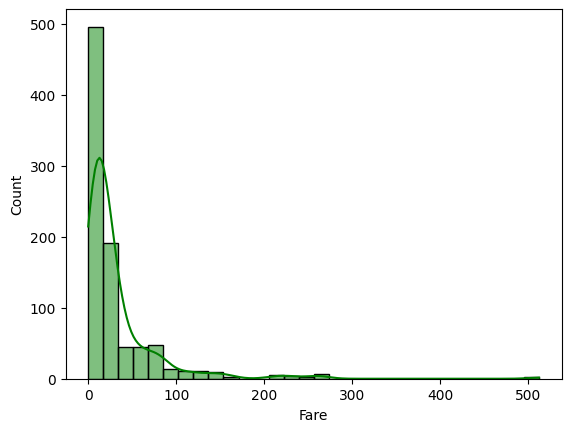

In [87]:
sns.histplot(data=train, x='Fare', bins=30, kde=True, color='green')
print(train['Fare'].mean())
print(train['Fare'].skew())
print(train['Fare'].kurt())

<Axes: xlabel='Fare'>

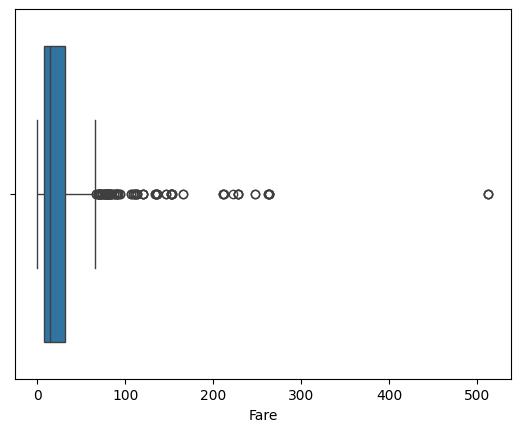

In [88]:
sns.boxplot(data=train, x='Fare')

For outlier we need to analyse it better before removing it because many outlier we see in the boxplot may be valid data points

#### Analysing other features with survival correlation with 'Survived' column

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


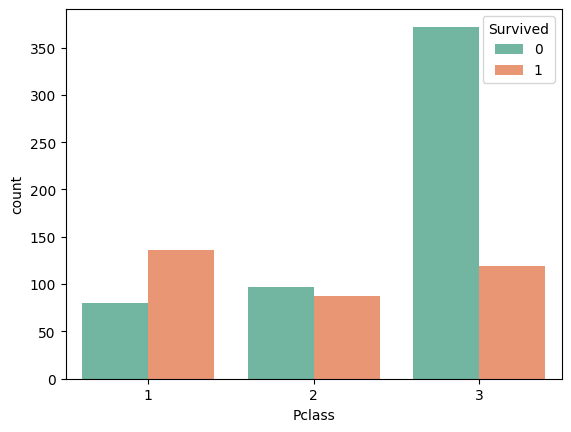

In [89]:
sns.countplot(data=train, x='Pclass', hue='Survived', palette='Set2')
pd.crosstab(train['Pclass'], train['Survived'], margins=True)

Survived,0,1,All
Sex,,,
female,81,233,314
male,468,109,577
All,549,342,891


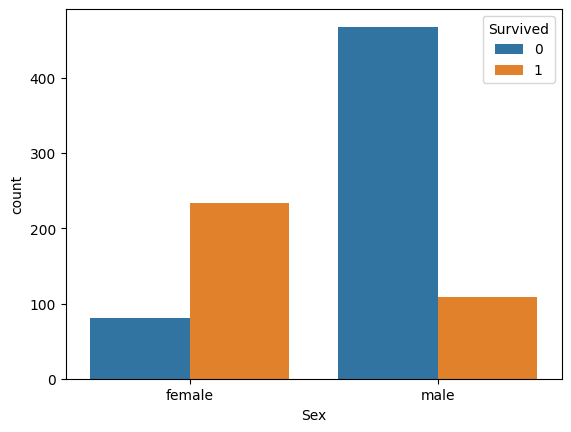

In [90]:
sns.countplot(data=train, x='Sex', hue='Survived')
pd.crosstab(train['Sex'], train['Survived'], margins=True)

Survived,0,1,All
Embarked,,,
C,75,93,168
Q,47,30,77
S,427,219,646
All,549,342,891


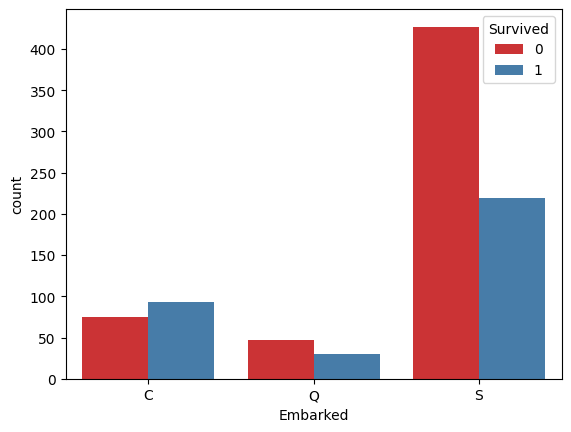

In [91]:
sns.countplot(data=train, x='Embarked', hue='Survived', palette='Set1')
pd.crosstab(train['Embarked'], train['Survived'], margins=True)

<Axes: xlabel='Age', ylabel='Count'>

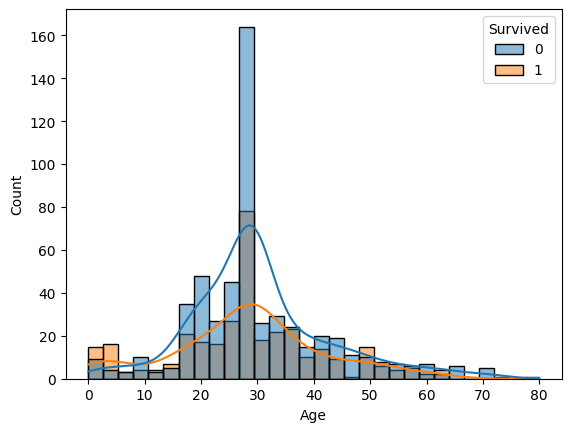

In [92]:
sns.histplot(data=train, x='Age', kde=True, color='green', hue='Survived')

<Axes: xlabel='Fare', ylabel='Count'>

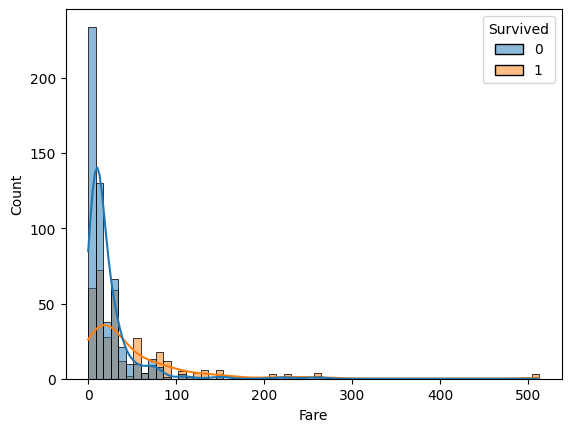

In [93]:
sns.histplot(data=train, x='Fare', kde=True, color='green', hue='Survived')

#### Pairplot to visualize the relationships between multiple features 

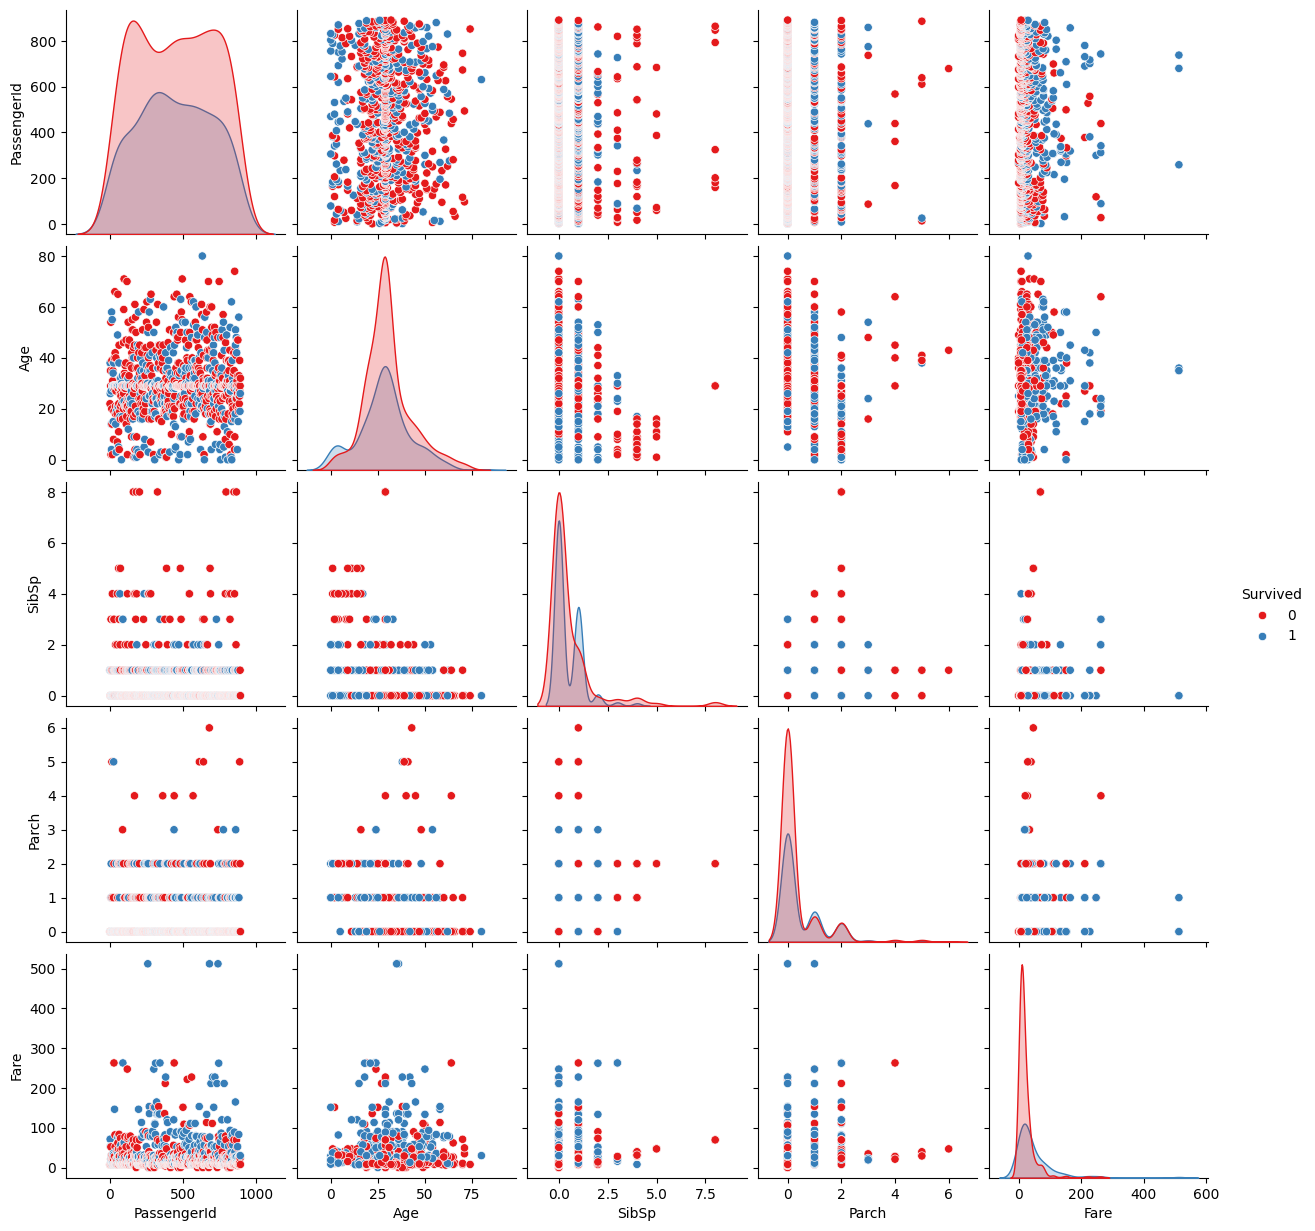

In [94]:
sns.pairplot(train, hue='Survived', palette='Set1')

#### Implementing correlation heatmap of numeric features with annotation

<Axes: >

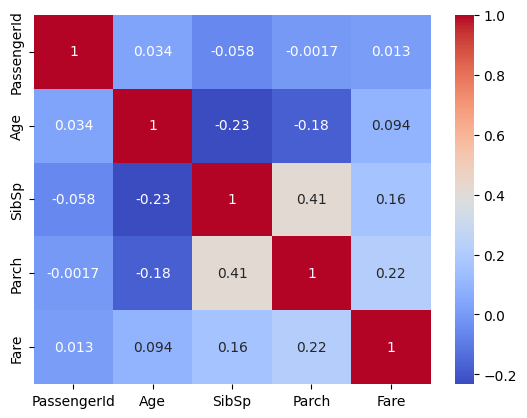

In [95]:
sns.heatmap(train.corr(numeric_only=True), annot=True, cmap='coolwarm')

#### Creating a new feature 'Family_size' which is the sum of 'SibSp' and 'Parch' columns

In [96]:
train['Family_size'] = train['SibSp'] + train['Parch']

In [97]:
train.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Family_size
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.925,S,0
812,813,0,2,"Slemen, Mr. Richard James",male,35,0,0,28206,10.500,S,0
693,694,0,3,"Saad, Mr. Khalil",male,25,0,0,2672,7.225,C,0
736,737,0,3,"Ford, Mrs. Edward (Margaret Ann Watson)",female,48,1,3,W./C. 6608,34.375,S,4
151,152,1,1,"Pears, Mrs. Thomas (Edith Wearne)",female,22,1,0,113776,66.600,S,1


In [98]:
def Family_type(size):
    if size == 0:
        return 'Alone'
    elif size <= 3:
        return 'Small'
    else:
        return 'Large'

Creating a new feature 'Family_type' based on 'Family_size' which categorizes families into 'Alone', 'Small', and 'Large' and helps in analyzing survival rates based on family size.

In [99]:
train['Family_type'] = train['Family_size'].apply(Family_type)

In [100]:
train.sample(6)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Family_size,Family_type
311,312,1,1,"Ryerson, Miss. Emily Borie",female,18,2,2,PC 17608,262.3750,C,4,Large
532,533,0,3,"Elias, Mr. Joseph Jr",male,17,1,1,2690,7.2292,C,2,Small
695,696,0,2,"Chapman, Mr. Charles Henry",male,52,0,0,248731,13.5000,S,0,Alone
648,649,0,3,"Willey, Mr. Edward",male,29,0,0,S.O./P.P. 751,7.5500,S,0,Alone
166,167,1,1,"Chibnall, Mrs. (Edith Martha Bowerman)",female,29,0,1,113505,55.0000,S,1,Small
470,471,0,3,"Keefe, Mr. Arthur",male,29,0,0,323592,7.2500,S,0,Alone


In [101]:
train.drop(columns=['SibSp', 'Parch', 'Family_size'], inplace=True)    

In [102]:
train.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Embarked,Family_type
274,275,1,3,"Healy, Miss. Hanora ""Nora""",female,29,370375,7.7500,Q,Alone
719,720,0,3,"Johnson, Mr. Malkolm Joackim",male,33,347062,7.7750,S,Alone
627,628,1,1,"Longley, Miss. Gretchen Fiske",female,21,13502,77.9583,S,Alone
86,87,0,3,"Ford, Mr. William Neal",male,16,W./C. 6608,34.3750,S,Large
123,124,1,2,"Webber, Miss. Susan",female,32,27267,13.0000,S,Alone


In [103]:
pd.crosstab(train['Family_type'], train['Survived'], margins=True)

Survived,0,1,All
Family_type,,,
Alone,374,163,537
Large,52,10,62
Small,123,169,292
All,549,342,891


Handling outliers in case of age column using the 3 sigma rule which states that 99.7% of data lies within 3 standard deviations from the mean

In [104]:
train = train[train['Age'] <= (train['Age'].mean() + 3*train['Age'].std())]
train.shape

(884, 10)

Handling outliers in 'Fare' column usinhg IQR method which helps in removing extreme values that could skew the analysis.

In [105]:
Q1 = train['Fare'].quantile(0.25)   
Q3 = train['Fare'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
train = train[(train['Fare'] >= lower_bound) & (train['Fare'] <= upper_bound)]
train.shape

(769, 10)

In [106]:
train.shape

(769, 10)

### One-hot encoding categorical variables

Here we are transforming Pclass, Sex, Embarked, Family_type into numerical columns

In [107]:
train_encoded = pd.get_dummies(data=train, columns=['Pclass', 'Sex', 'Embarked', 'Family_type'], drop_first=True)

In [108]:
bool_cols = train_encoded.select_dtypes(include=['bool']).columns
train_encoded[bool_cols] = train_encoded[bool_cols].astype('int64')

Converting boolean columns which  are created due to one-hot encoding to int64 type

In [109]:
train_encoded.sample(5)

,PassengerId,Survived,Name,Age,Ticket,Fare,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S,Family_type_Large,Family_type_Small
890,891,0,"Dooley, Mr. Patrick",32,370376,7.7500,0,1,1,1,0,0,0
286,287,1,"de Mulder, Mr. Theodore",30,345774,9.5000,0,1,1,0,1,0,0
593,594,0,"Bourke, Miss. Mary",29,364848,7.7500,0,1,0,1,0,0,1
489,490,1,"Coutts, Master. Eden Leslie ""Neville""",9,C.A. 37671,15.9000,0,1,1,0,1,0,1
378,379,0,"Betros, Mr. Tannous",20,2648,4.0125,0,1,1,0,0,0,0


In [110]:
train.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Embarked,Family_type
840,841,0,3,"Alhomaki, Mr. Ilmari Rudolf",male,20,SOTON/O2 3101287,7.9250,S,Alone
136,137,1,1,"Newsom, Miss. Helen Monypeny",female,19,11752,26.2833,S,Small
49,50,0,3,"Arnold-Franchi, Mrs. Josef (Josefine Franchi)",female,18,349237,17.8000,S,Small
578,579,0,3,"Caram, Mrs. Joseph (Maria Elias)",female,29,2689,14.4583,C,Small
813,814,0,3,"Andersson, Miss. Ebba Iris Alfrida",female,6,347082,31.2750,S,Large


Heatmap to visualize correlations among features in the encoded training dataset                    
From heatmap we can analysemultiple relationships between features

<Axes: >

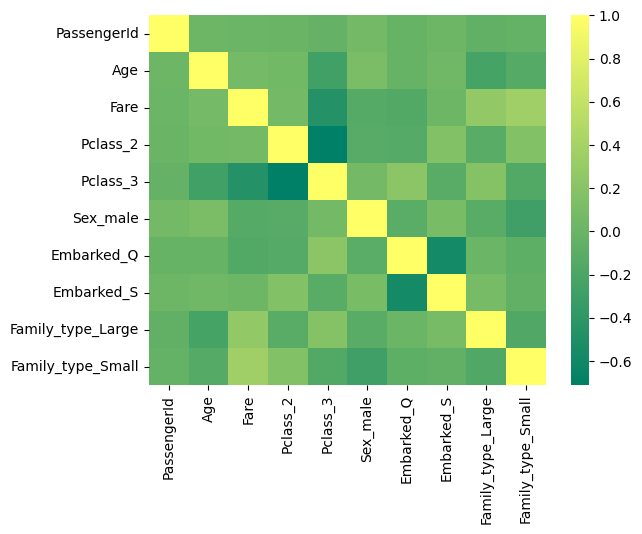

In [111]:
sns.heatmap(train_encoded.corr(numeric_only=True),  cmap='summer')

### Analysis on Name column

In [112]:
train['Title'] = train['Name'].str.extract(r' ([A-Za-z]+)\.', expand=False)

In [113]:
train['Title'].value_counts()

Title
Mr          472
Miss        143
Mrs          97
Master       36
Rev           6
Dr            5
Col           2
Major         2
Don           1
Ms            1
Lady          1
Sir           1
Mlle          1
Jonkheer      1
Name: count, dtype: int64

In [114]:
pd.crosstab(train['Title'], train['Survived'], normalize='index')

Survived,0,1
Title,,
Col,0.500000,0.500000
Don,1.000000,0.000000
Dr,0.600000,0.400000
Jonkheer,1.000000,0.000000
Lady,0.000000,1.000000
Major,0.500000,0.500000
Master,0.444444,0.555556
Miss,0.356643,0.643357
Mlle,0.000000,1.000000


In [115]:
train['Title'] = train['Title'].replace(
    ['Lady','Countess','Capt','Col','Don','Dr','Major','Rev','Sir','Jonkheer','Dona'],
    'Rare'
)
train['Title'] = train['Title'].replace({'Mlle':'Miss','Ms':'Miss','Mme':'Mrs'})


In [116]:
pd.crosstab(train['Title'], train['Survived'], normalize='index')

Survived,0,1
Title,,
Master,0.444444,0.555556
Miss,0.351724,0.648276
Mr,0.851695,0.148305
Mrs,0.257732,0.742268
Rare,0.684211,0.315789


Key insight from the name column is that :                 
Mrs and Miss had higher survival rates compared to Mr, Master and Rare titles.

In [117]:
pd.crosstab(train['Title'], train['Pclass'], normalize='index')


Pclass,1,2,3
Title,,,
Master,0.000000,0.250000,0.750000
Miss,0.075862,0.241379,0.682759
Mr,0.154661,0.180085,0.665254
Mrs,0.144330,0.422680,0.432990
Rare,0.578947,0.421053,0.000000


After analysing the names with pclass and survival we can see that Mr is mostly in Pclass 3 and has low surviavl rate whereas titles like Miss, Mrs are mostly in Pclass 1 and 2 with high survival rate.

<Axes: xlabel='Title', ylabel='Survived'>

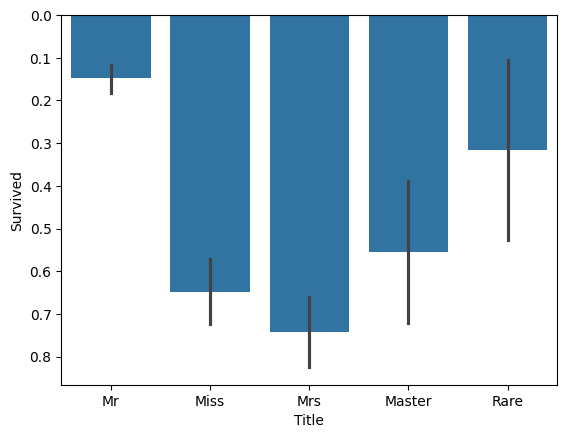

In [118]:
import seaborn as sns
sns.barplot(x='Title', y='Survived', data=train)

### Analysis on Ticket column

In [119]:
train['Ticket']

0             A/5 21171
2      STON/O2. 3101282
3                113803
4                373450
5                330877
             ...       
886              211536
887              112053
888          W./C. 6607
889              111369
890              370376
Name: Ticket, Length: 769, dtype: object

In [120]:
# create ticket group size
train['Ticket_group_size'] = train.groupby('Ticket')['Ticket'].transform('count')

In [121]:
# survival by ticket group size
pd.crosstab(train['Ticket_group_size'], train['Survived'], normalize='index')

Survived,0,1
Ticket_group_size,,
1,0.708647,0.291353
2,0.478571,0.521429
3,0.416667,0.583333
4,0.666667,0.333333
5,1.000000,0.000000
6,1.000000,0.000000
7,0.642857,0.357143


Solo tickets -> lower survival                                         
Small ticket groups -> higher survival

In [122]:
# ticket prefix
train['Ticket_prefix'] = train['Ticket'].str.extract(r'([A-Za-z./]+)')
train['Ticket_prefix'] = train['Ticket_prefix'].fillna('NONE')

In [123]:
# Survival by prefix
pd.crosstab(train['Ticket_prefix'], train['Survived'], normalize='index')

Survived,0,1
Ticket_prefix,,
A,1.000000,0.000000
A.,1.000000,0.000000
A./,1.000000,0.000000
A/,0.913043,0.086957
A/S,1.000000,0.000000
C,0.600000,0.400000
C.A.,0.500000,0.500000
C.A./SOTON,1.000000,0.000000
CA,1.000000,0.000000


In [124]:
# family with ticket size
pd.crosstab(train['Family_type'], train['Ticket_group_size'])

Ticket_group_size,1,2,3,4,5,6,7
Family_type,,,,,,,
Alone,453,28,5,4,0,0,7
Large,2,0,1,16,5,18,7
Small,77,112,30,4,0,0,0


<Axes: xlabel='Ticket_group_size', ylabel='Survived'>

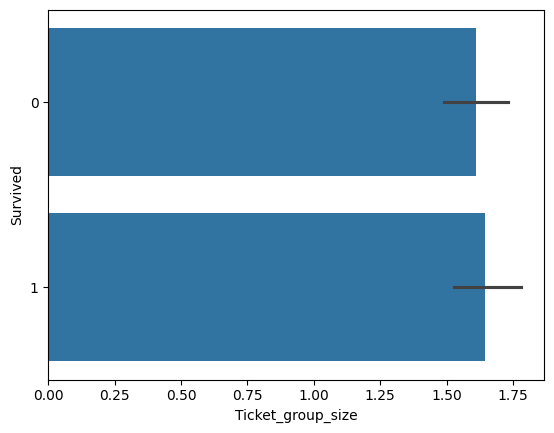

In [125]:
sns.barplot(x='Ticket_group_size', y='Survived', data=train)

Although Name and Ticket are textual, extracting titles and ticket group sizes
reveals strong social and behavioral patterns that significantly impact survival

## Final conclusion:      
- The final analysis shows that the most important features in determining survival are Pclass, Sex, Age, Fare, Embarked, and Family_type.
- People in higher classes (1st class) had a higher survival rate compared to those in lower classes (3rd class).
- Younger passengers had a higher survival rate compared to older passengers.
- Passengers who paid higher fares had a higher survival rate compared to those who paid lower fares.
- Passengers who embarked from certain ports (like Cherbourg) had a higher survival rate compared to others.
- Passengers traveling alone or with large families had a lower survival rate compared to those traveling with family


#### The survival rate can be further analyzed by combining these features together to get a better understanding of the survival patterns.
